# Mushroom Dataset Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Get Data

In [2]:
df = pd.read_csv('files/mushrooms.csv')
df.info() # 8000 specimens, 22 features and a target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.describe() # no missing values, all categorical. Use random forest.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Data Preprocessing

### Create dummies for all categorical features

In [13]:
dummies = pd.get_dummies(df.drop('class',axis=1),columns=df.drop('class',axis=1).columns,drop_first=True)
dummies.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Convert class into numerical

In [14]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [15]:
cls = df['class'].apply(lambda x: 1 if x=='p' else 0)
cls

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

### Concatenate resulting dataframes

In [16]:
final = pd.concat([dummies,cls],axis=1)
final.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Split the data into train and test

In [17]:
X = final.drop('class',axis=1)
y = final['class']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree

### Build and train model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

### Make predictions on test data

In [23]:
pred = dtc.predict(X_test)

### Evaluate model performance

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

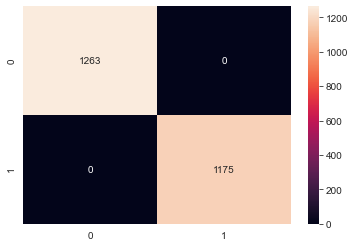

In [25]:
# 1263 TN, 0 FP, 0 FN, 1175 TP 
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [26]:
# 100% accuracy, precision, recall, f1
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Random Forest

### Build and train model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=200)

In [29]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

### Make predictions on test data

In [30]:
pred = rfc.predict(X_test)

### Evaluate model performance

<AxesSubplot:>

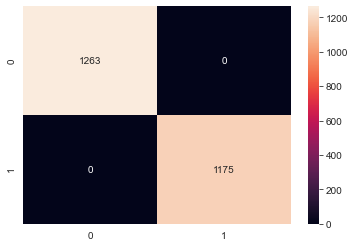

In [31]:
# 1263 TN, 0 FP, 0 FN, 1175 TP 
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='g')

In [32]:
# 100% accuracy, precision, recall, f1
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

